In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
# https://github.com/Sancho-kim/LinAlg4DS

### [연습문제 1-2]
[식 1-7]을 코드로 변환해서 벡터 노름을 계산하는 알고리즘을 작성합니다. 차원과 방향이 다른 난수 벡터를 사용해서 np.linalg.norm() 과 동일한 결과를 얻는지 확인합니다. 이 실습을 통해 NumPy 배열 인덱싱과 수식을 코드로 변환하는 경험을 쌓게 될 것 입니다. 실제로는 np.linalg.norm()을 사용하는 것이 더 간단합니다.

In [6]:
v=np.array([1,2,3,7,8,9])
v_dim=len(v)
v_mag=np.linalg.norm(v)

print(v)
print(v_dim)
print(v_mag)

[1 2 3 7 8 9]
6
14.422205101855956


In [12]:
import math

def norm(v):
  a=0
  for i in v:
    k=i*i
    a+=k
  return math.sqrt(a)

norm(v)

# 오랜만에 코딩을 직접해보니 구리다..

14.422205101855956

###[연습문제 1-5]
np.transpose(v) 또는 v.T와 같은 내장 함수 또는 메서드를 사용하지 않고 행벡터를 열벡터로 전치하는 for 루프를 작성합니다. 이 실습을 통해 방향을 가진 벡터를 생성하고 인덱싱하는 법을 배울수 있습니다.

In [23]:
## gpt 사랑해

v=np.array([[1,2,3],[4,5,6]])

# 전치된 배열을 저장할 빈 리스트 생성
v_transposed = []

# for 루프를 이용해 행렬을 전치
for i in range(len(v[0])):  # 열의 개수만큼 반복
    new_row = []
    for j in range(len(v)):  # 행의 개수만큼 반복
        new_row.append(v[j][i])
    v_transposed.append(new_row)

# 결과를 numpy 배열로 변환
v_transposed = np.array(v_transposed)
v_transposed

array([[1, 4],
       [2, 5],
       [3, 6]])

###[연습문제 1-6]
흥미로운 사실이 있습니다. 벡터의 제곱 노름을 그 벡터 자체의 내적으로 계산할 수 있습니다. 식[1-7] 을 떠올려 보면 이것이 같다는 것을 알 수 있습니다. 파이썬을 사용해서 확인해보세요.

In [18]:
v=np.array([1,2,3,7,8,9])
v_dim=len(v)
v_mag=np.linalg.norm(v)

import math

def norm(v):
  a=0
  for i in v:
    k=i*i
    a+=k
  return math.sqrt(a)

print(norm(v))

# 내적 시키기
dot_product = np.dot(v,np.transpose(v))
print(math.sqrt(dot_product))

14.422205101855956
14.422205101855956


###[연습문제 1-7]
내적의 교환 법칙을 입증하는 코드를 작성하니다. 교환 법칙은 a x b = b x a 를 의미하며, 벡터-내적에서는 aTb = bTa 입니다. 코드를 통해 구현한 다음 [식1-9] 를 사용해 내적이 교환가능한 이유를 이해해 봅시다.

In [24]:
## gpt 해설

# 두 벡터 a, b를 정의합니다.
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# a.T @ b와 b.T @ a 계산
dot_product_ab = np.dot(a.T, b)
dot_product_ba = np.dot(b.T, a)

# 결과 출력
print(f"a.T @ b = {dot_product_ab}")
print(f"b.T @ a = {dot_product_ba}")

# 교환 법칙 확인
if np.allclose(dot_product_ab, dot_product_ba):
    print("교환 법칙이 성립합니다: a.T @ b = b.T @ a")
else:
    print("교환 법칙이 성립하지 않습니다.")



## 교재 해설

# dimensionality
n = 11

# some random column vectors
a = np.random.randn(n,1)
b = np.random.randn(n,1)

# dot products both ways
atb = np.sum(a*b)
bta = np.sum(b*a)

# they're equal if their difference is 0
atb - bta

a.T @ b = 32
b.T @ a = 32
교환 법칙이 성립합니다: a.T @ b = b.T @ a


0.0

###[연습문제 1-9]
직교벡터 분해를 구현합니다. 두 난수 벡터 t와 r로 시작해서 그림[1-8]을 재현합니다. (난수 때문에 그림이 다소 다르게 보일 수 있습니다.) 그런 다음 두 성분의 합이 t이고 tㅗr 과 t || r이 직교하는지 확인합니다.

Original vector t: [ 0.38078508 -0.49030006]
Sum of components t_para + t_perp: [ 0.38078508 -0.49030006]
Dot product of t_para and t_perp (should be close to zero): -2.168404344971009e-19


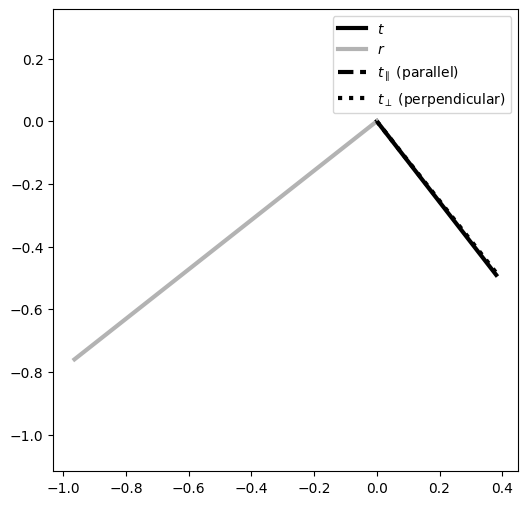

In [33]:
## gpt

import numpy as np
import matplotlib.pyplot as plt

# generate random R2 vectors (note: no orientation here! we don't need it for this exercise)
t = np.random.randn(2)
r = np.random.randn(2)

# the decomposition
t_para = r * (np.dot(t, r) / np.dot(r, r))
t_perp = t - t_para

# confirm that the two components sum to the target
print("Original vector t:", t)
print("Sum of components t_para + t_perp:", t_para + t_perp)

# confirm orthogonality (dot product must be zero!)
print("Dot product of t_para and t_perp (should be close to zero):", np.dot(t_para, t_perp))

# draw them!
plt.figure(figsize=(6, 6))

# draw main vectors
plt.plot([0, t[0]], [0, t[1]], color='k', linewidth=3, label=r'$t$')
plt.plot([0, r[0]], [0, r[1]], color=[.7, .7, .7], linewidth=3, label=r'$r$')

# draw decomposed vector components
plt.plot([0, t_para[0]], [0, t_para[1]], 'k--', linewidth=3, label=r'$t_{\parallel}$ (parallel)')
plt.plot([0, t_perp[0]], [0, t_perp[1]], 'k:', linewidth=3, label=r'$t_{\perp}$ (perpendicular)')

# make the plot look nicer
plt.axis('equal')
plt.legend()
plt.savefig('Figure_01_08.png', dpi=300)
plt.show()

[-1.10574566  0.86857215]
[-1.10574566  0.86857215]
1.1102230246251565e-16


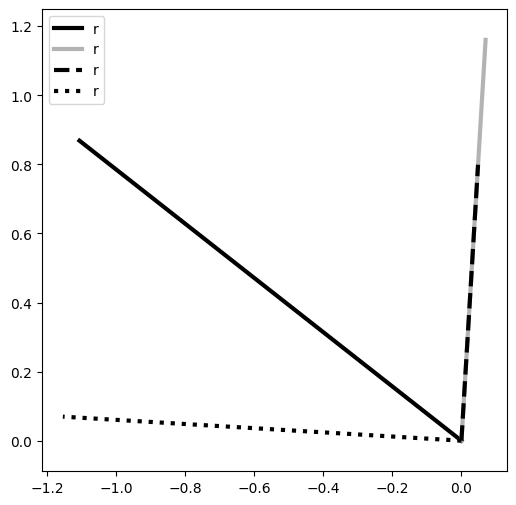

In [32]:
## 교재

# generate random R2 vectors (note: no orientation here! we don't need it for this exercise)
t = np.random.randn(2)
r = np.random.randn(2)

# the decomposition
t_para = r * (np.dot(t,r) / np.dot(r,r))
t_perp = t - t_para

# confirm that the two components sum to the target
print(t)
print( t_para+t_perp )

# confirm orthogonality (dot product must be zero!)
print( np.dot(t_para,t_perp) )
# Note about this result: Due to numerical precision errors,
#   you might get a result of something like 10^-17, which can be interpretd as zero.



# draw them!
plt.figure(figsize=(6,6))

# draw main vectors
plt.plot([0,t[0]],[0,t[1]],color='k',linewidth=3,label='r')
plt.plot([0,r[0]],[0,r[1]],color=[.7,.7,.7],linewidth=3,label='r')

# draw decomposed vector components
plt.plot([0,t_para[0]],[0,t_para[1]],'k--',linewidth=3,label='r')
plt.plot([0,t_perp[0]],[0,t_perp[1]],'k:',linewidth=3,label='r')

plt.axis('equal')
plt.legend()
plt.savefig('Figure_01_08.png',dpi=300)
plt.show()
